Reading file: F:\tesla-optimus-business-analysis\data\processed\Tesla_Financial_Forecast_Optimistic.xlsx
File loaded successfully!

Generating Chart 1: Total Revenue and Net Income Trend...


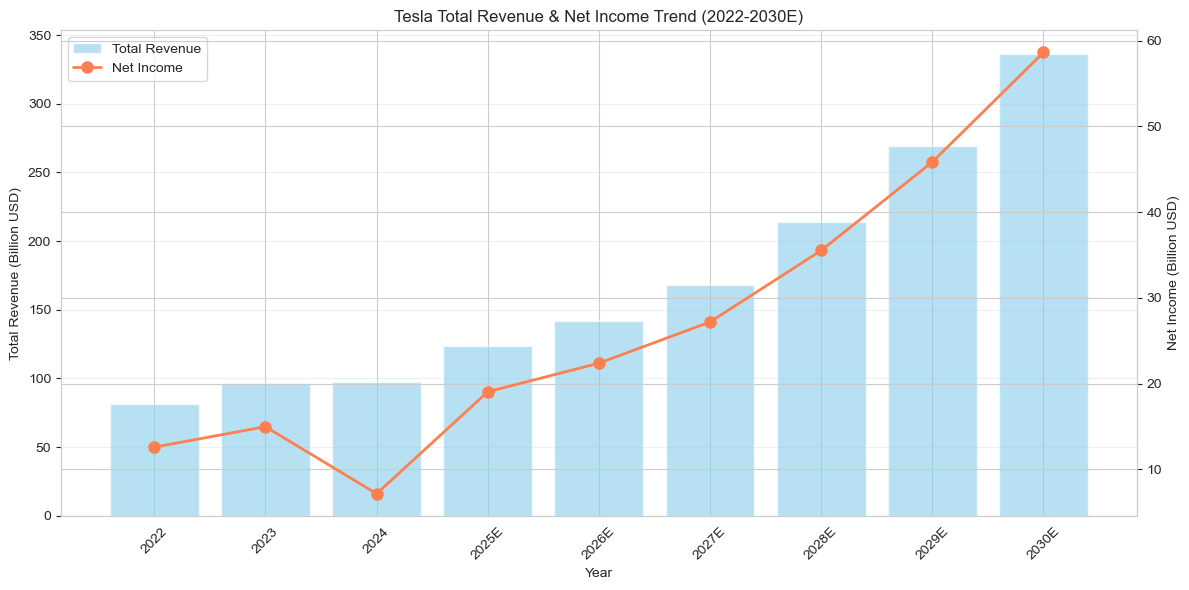


Generating Chart 2: Revenue Composition by Segment...


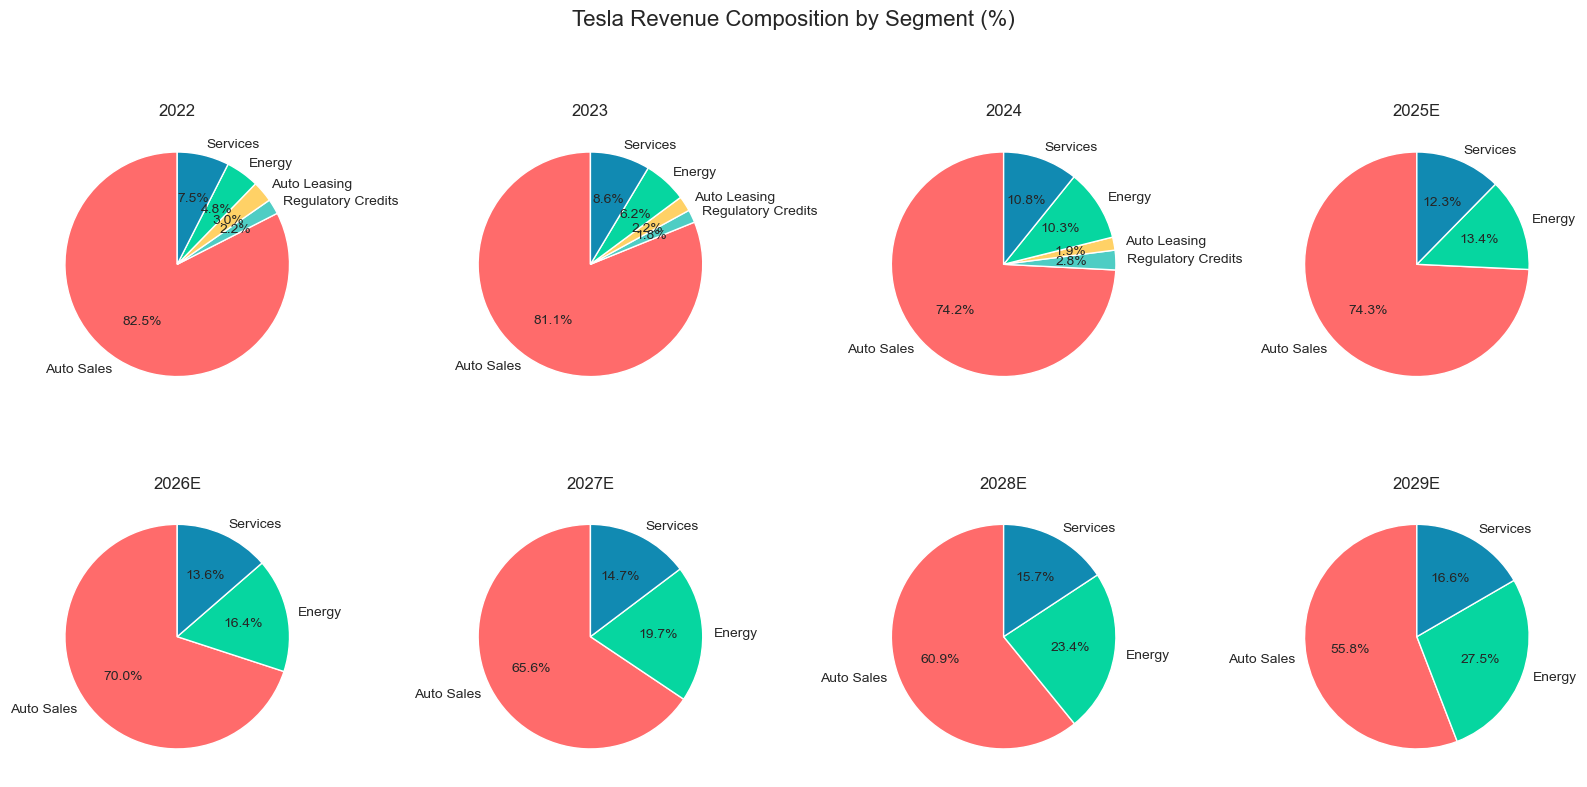


Generating Chart 3: Profit Margin Trend...


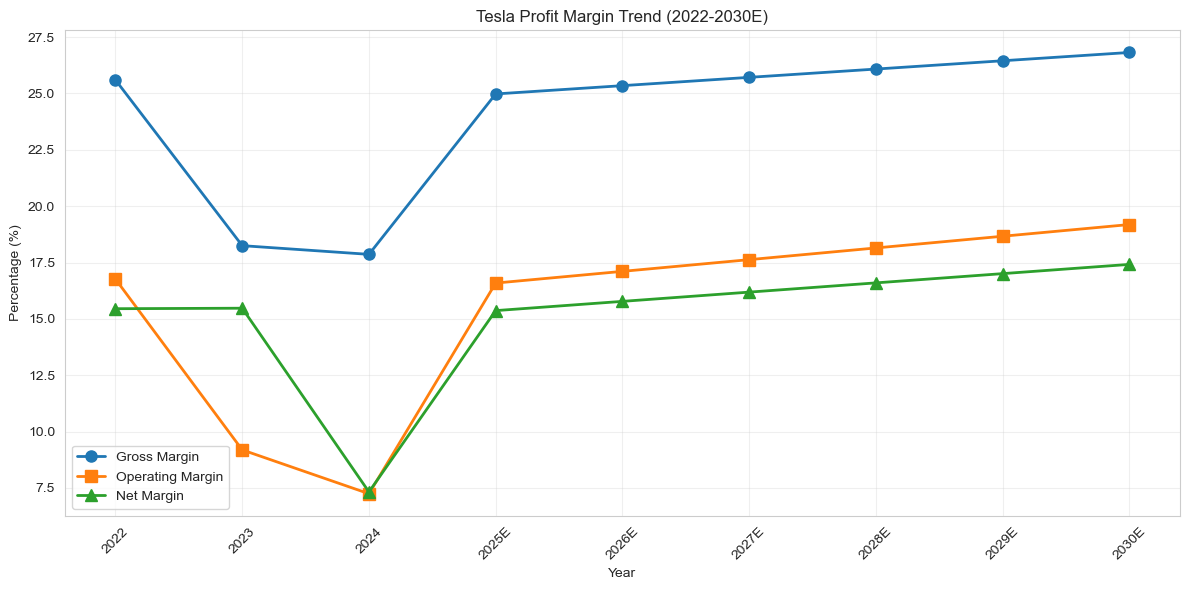


Generating Chart 4: Assets and Liabilities Structure...


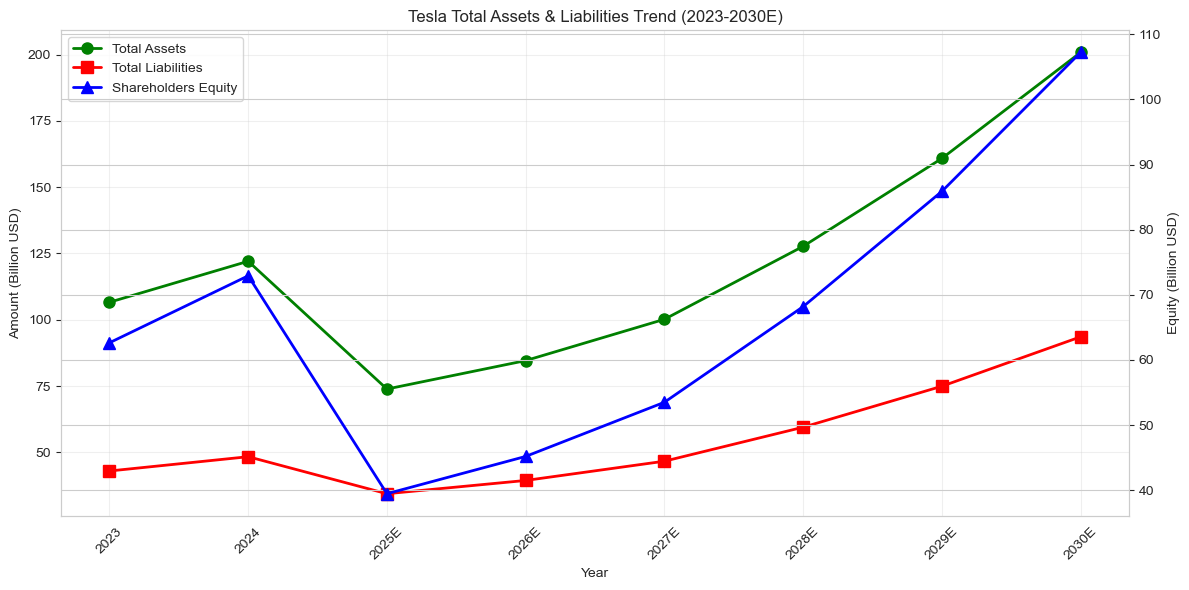


Generating Chart 5: Cash Flow Trend...


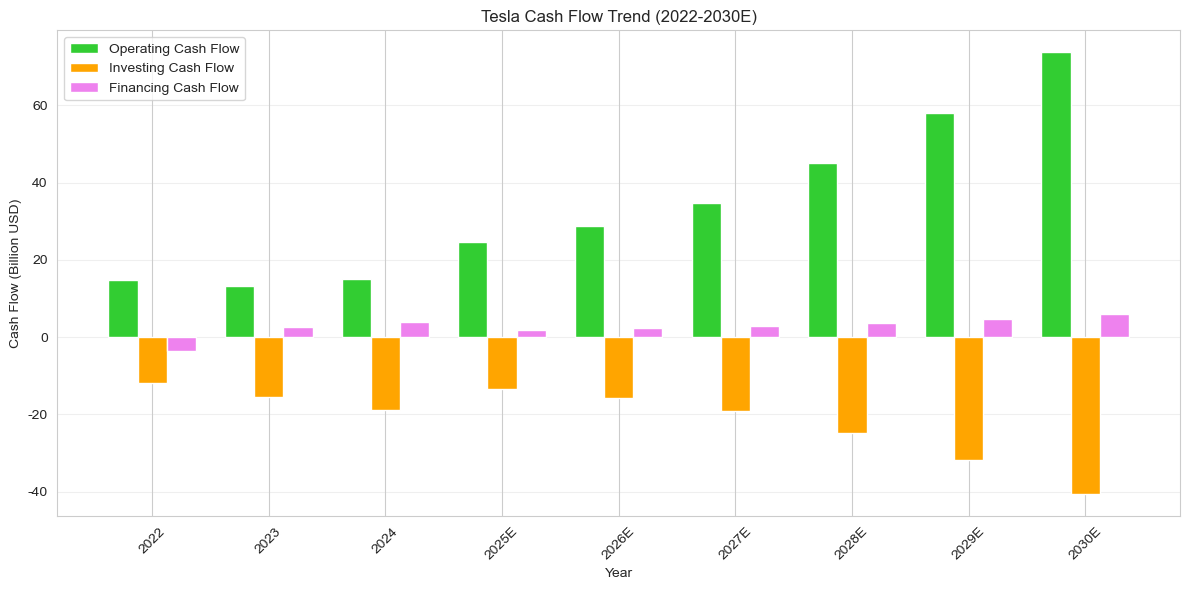


Generating Chart 6: Revenue and Net Income Growth Rate...


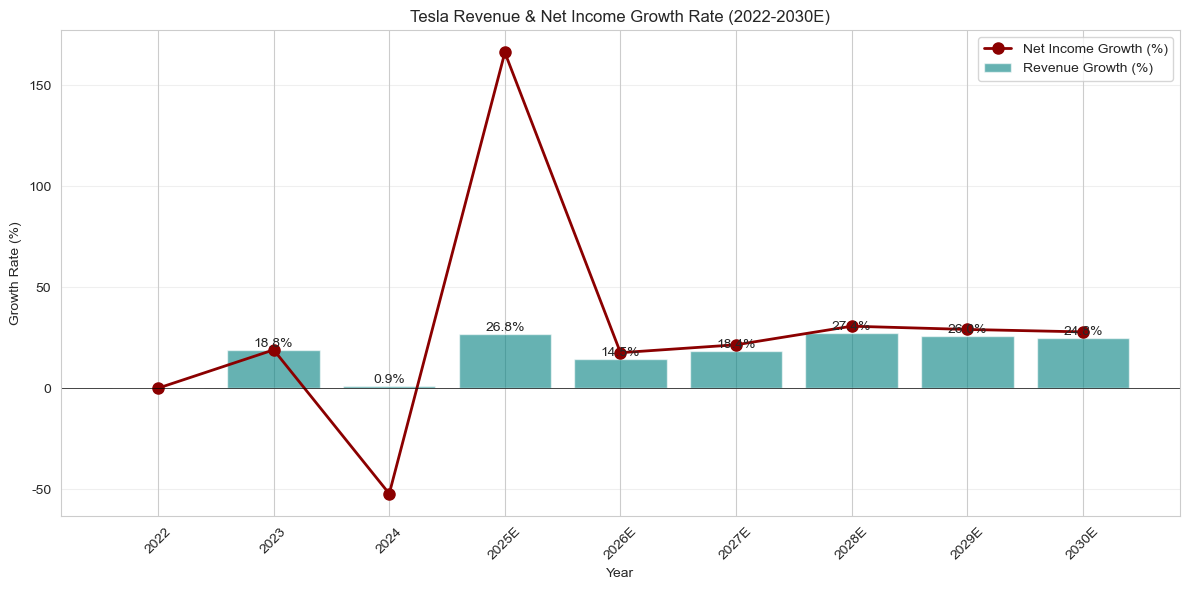


Generating Chart 7: Key Financial Ratios...


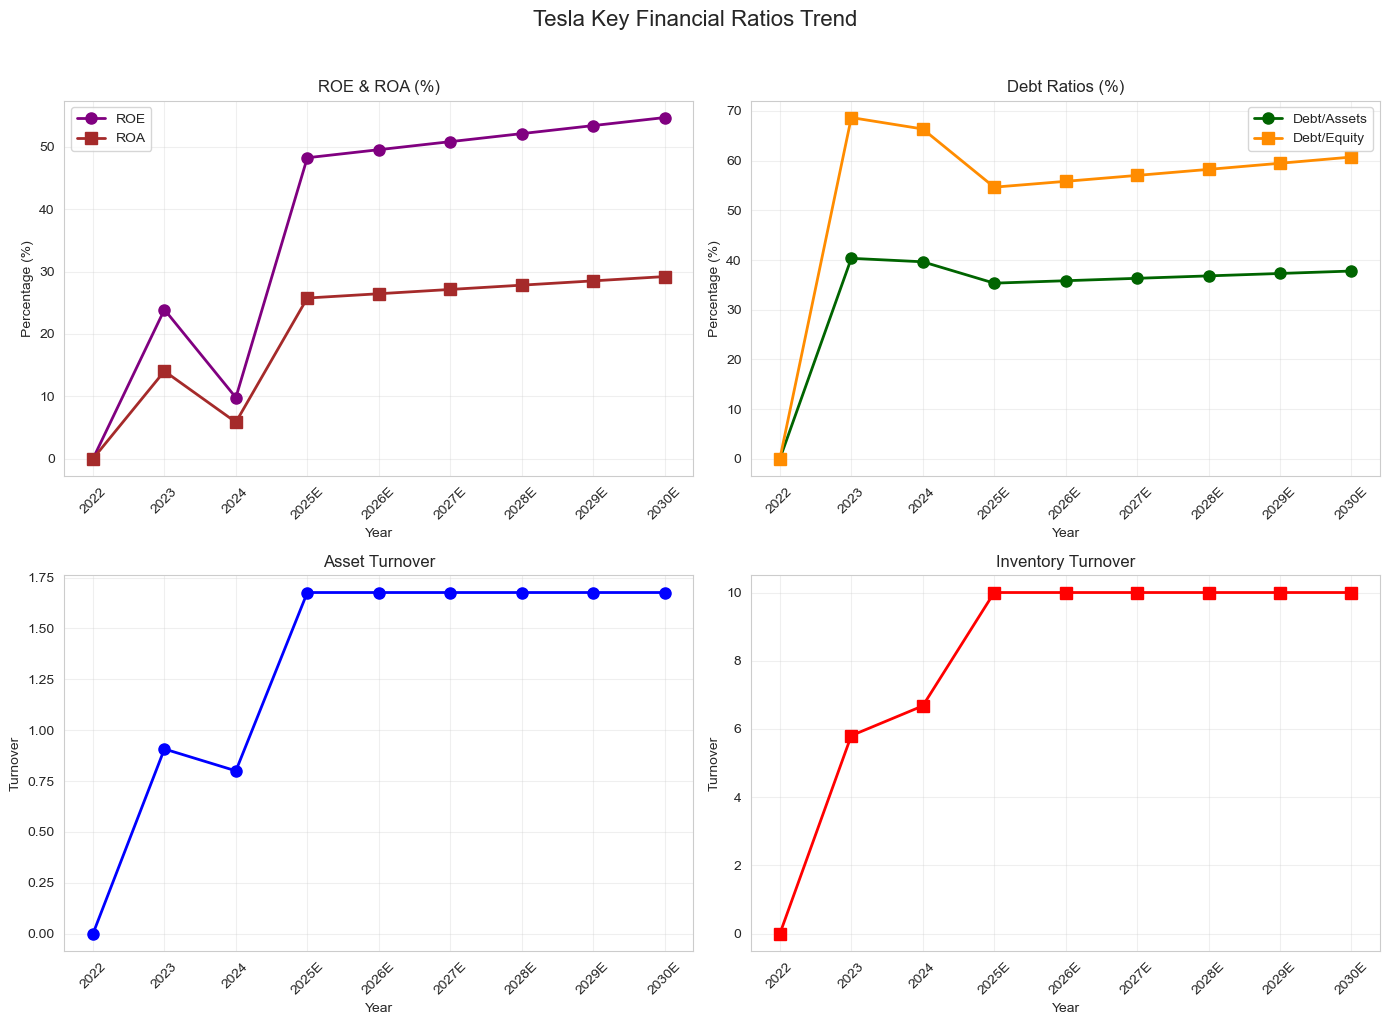


Generating Chart 8: Revenue History and Forecast...


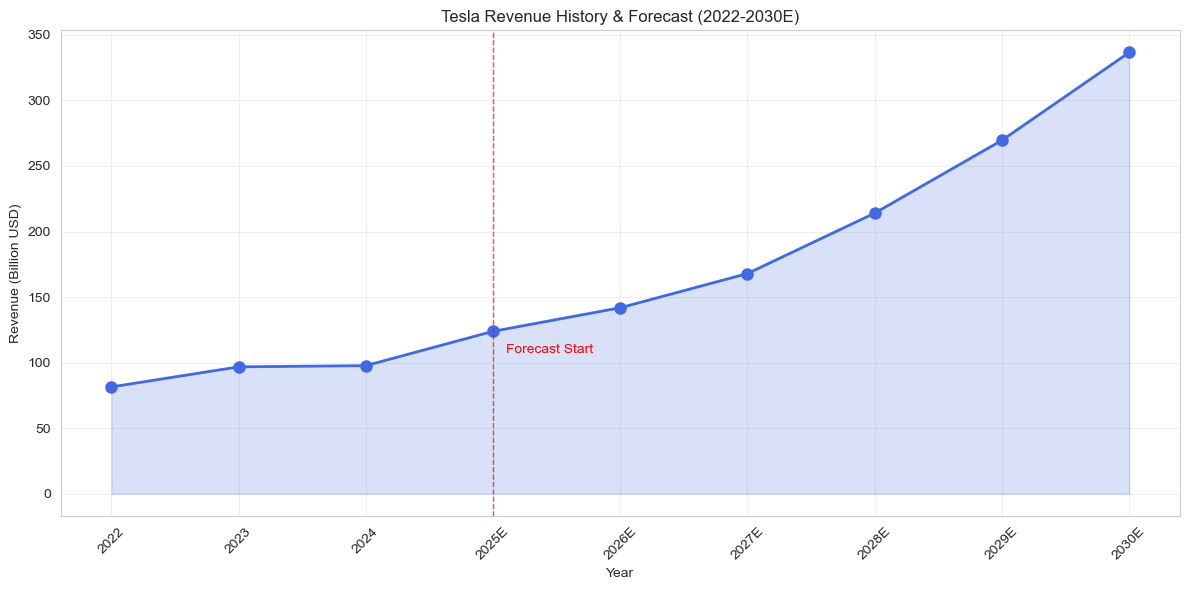


All charts generated successfully!

Data Overview:
------------------------------
Income Statement shape: (9, 20)
Balance Sheet shape: (9, 17)
Cash Flow shape: (9, 7)
Financial Ratios shape: (9, 13)

Revenue Forecast Summary:
------------------------------
 Year  Revenue_Billions  YoY_Growth
 2022            81.462    0.000000
 2023            96.773   18.795267
 2024            97.690    0.947578
2025E           123.884   26.813133
2026E           141.856   14.507310
2027E           167.953   18.396796
2028E           214.044   27.442724
2029E           269.589   25.950302
2030E           336.581   24.849739

Key Metrics (2024 vs 2030E):
------------------------------
2024年实际收入（百万美元）: $97,690
2030年预测收入（百万美元）: $336,581
6年复合增长率（CAGR）: 22.9%
2024年净利润率: 7.3%
2030年预测净利润率: 17.4%
2024年ROE: 9.8%
2030年预测ROE: 54.7%
2024年总资产（百万美元）: $122,070


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# 设置图表样式（使用英文，不需要中文字体）
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

# 文件路径
file_path = r"F:\tesla-optimus-business-analysis\data\processed\Tesla_Financial_Forecast_Optimistic.xlsx"

if not os.path.exists(file_path):
    print(f"File not found: {file_path}")
else:
    print(f"Reading file: {file_path}")
    
    try:
        # 读取数据
        income_df = pd.read_excel(file_path, sheet_name='Income Statement (optimistic)')
        balance_df = pd.read_excel(file_path, sheet_name='Balance Sheet (optimistic)')
        cashflow_df = pd.read_excel(file_path, sheet_name='Cash Flow (optimistic)')
        ratios_df = pd.read_excel(file_path, sheet_name='Financial Ratios (optimistic)')
        growth_df = pd.read_excel(file_path, sheet_name='Growth Analysis (optimistic)')
        revenue_detail_df = pd.read_excel(file_path, sheet_name='Revenue Details (optimistic)')
        summary_df = pd.read_excel(file_path, sheet_name='Executive Summary (optimistic)')
        
        print("File loaded successfully!")
        
        # 1. Total Revenue and Net Income Trend
        print("\n" + "="*50)
        print("Generating Chart 1: Total Revenue and Net Income Trend...")
        print("="*50)
        
        fig, ax1 = plt.subplots(figsize=(12, 6))
        years = income_df['Year'].astype(str)
        
        # 确保数据是数值类型
        revenue_data = pd.to_numeric(income_df['Total Revenue'], errors='coerce').fillna(0) / 1e3
        net_income_data = pd.to_numeric(income_df['Net Income'], errors='coerce').fillna(0) / 1e3
        
        ax1.bar(years, revenue_data, alpha=0.6, label='Total Revenue', color='skyblue')
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Total Revenue (Billion USD)')
        ax1.set_title('Tesla Total Revenue & Net Income Trend (2022-2030E)')
        ax1.tick_params(axis='x', rotation=45)
        ax1.grid(True, alpha=0.3, axis='y')

        ax2 = ax1.twinx()
        ax2.plot(years, net_income_data, marker='o', color='coral', 
                linewidth=2, markersize=8, label='Net Income')
        ax2.set_ylabel('Net Income (Billion USD)')
        
        # 添加图例
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
        
        plt.tight_layout()
        plt.show()

        # 2. Revenue Composition by Segment (修复饼图问题)
        print("\n" + "="*50)
        print("Generating Chart 2: Revenue Composition by Segment...")
        print("="*50)
        
        revenue_cols = ['Automotive Sales Revenue', 'Automotive Regulatory Credits', 
                        'Automotive Leasing Revenue', 'Energy Revenue', 'Services Revenue']
        labels = ['Auto Sales', 'Regulatory Credits', 'Auto Leasing', 'Energy', 'Services']
        colors = ['#FF6B6B', '#4ECDC4', '#FFD166', '#06D6A0', '#118AB2']
        
        # 选择有数据的年份
        available_years = income_df['Year'].dropna().unique()[:8]  # 只取前8个年份
        
        fig, axes = plt.subplots(2, 4, figsize=(16, 8))
        axes = axes.flatten()
        
        for i, year in enumerate(available_years):
            row = income_df[income_df['Year'] == year]
            values = []
            valid_labels = []
            valid_colors = []
            
            # 只包含非零值
            for j, col in enumerate(revenue_cols):
                if col in row.columns:
                    val = row[col].values[0] if not pd.isna(row[col].values[0]) else 0
                    if val > 0:  # 只包含正值
                        values.append(val)
                        valid_labels.append(labels[j])
                        valid_colors.append(colors[j])
            
            if values:  # 确保有数据
                # 检查是否需要添加一个小的偏移量以避免数值问题
                values = np.array(values)
                if np.sum(values) == 0:
                    # 如果所有值都是0，跳过这个饼图
                    axes[i].text(0.5, 0.5, 'No Data', ha='center', va='center')
                    axes[i].set_title(f'{year}')
                    axes[i].set_aspect('equal')
                else:
                    # 添加一个小的偏移量避免数值问题
                    values = values + 1e-9
                    axes[i].pie(values, labels=valid_labels, colors=valid_colors, 
                               autopct='%1.1f%%', startangle=90)
                    axes[i].set_title(f'{year}')
            else:
                axes[i].text(0.5, 0.5, 'No Data', ha='center', va='center')
                axes[i].set_title(f'{year}')
                axes[i].set_aspect('equal')
        
        # 隐藏多余的子图
        for j in range(len(available_years), len(axes)):
            axes[j].axis('off')
        
        plt.suptitle('Tesla Revenue Composition by Segment (%)', fontsize=16, y=1.02)
        plt.tight_layout()
        plt.show()

        # 3. Profit Margin Trend
        print("\n" + "="*50)
        print("Generating Chart 3: Profit Margin Trend...")
        print("="*50)
        
        fig, ax = plt.subplots(figsize=(12, 6))
        years = ratios_df['Year'].astype(str)
        
        # 确保数据是数值类型
        gross_margin = pd.to_numeric(ratios_df['Gross_Margin'], errors='coerce').fillna(0) * 100
        operating_margin = pd.to_numeric(ratios_df['Operating_Margin'], errors='coerce').fillna(0) * 100
        net_margin = pd.to_numeric(ratios_df['Net_Margin'], errors='coerce').fillna(0) * 100
        
        ax.plot(years, gross_margin, marker='o', label='Gross Margin', 
                linewidth=2, markersize=8)
        ax.plot(years, operating_margin, marker='s', label='Operating Margin', 
                linewidth=2, markersize=8)
        ax.plot(years, net_margin, marker='^', label='Net Margin', 
                linewidth=2, markersize=8)
        
        ax.set_xlabel('Year')
        ax.set_ylabel('Percentage (%)')
        ax.set_title('Tesla Profit Margin Trend (2022-2030E)')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)
        plt.tight_layout()
        plt.show()

        # 4. Assets and Liabilities Structure
        print("\n" + "="*50)
        print("Generating Chart 4: Assets and Liabilities Structure...")
        print("="*50)
        
        # 清理资产负债表数据
        balance_clean = balance_df.dropna(subset=['Year', 'Total Assets', 'Total Liabilities', 'Total Equity'])
        
        if not balance_clean.empty:
            fig, ax1 = plt.subplots(figsize=(12, 6))
            years = balance_clean['Year'].astype(str)
            
            # 确保数据是数值类型
            total_assets = pd.to_numeric(balance_clean['Total Assets'], errors='coerce').fillna(0) / 1e3
            total_liabilities = pd.to_numeric(balance_clean['Total Liabilities'], errors='coerce').fillna(0) / 1e3
            total_equity = pd.to_numeric(balance_clean['Total Equity'], errors='coerce').fillna(0) / 1e3
            
            ax1.plot(years, total_assets, marker='o', 
                    label='Total Assets', linewidth=2, markersize=8, color='green')
            ax1.plot(years, total_liabilities, marker='s', 
                    label='Total Liabilities', linewidth=2, markersize=8, color='red')
            ax1.set_xlabel('Year')
            ax1.set_ylabel('Amount (Billion USD)')
            ax1.set_title('Tesla Total Assets & Liabilities Trend (2023-2030E)')
            ax1.legend(loc='upper left')
            ax1.tick_params(axis='x', rotation=45)
            ax1.grid(True, alpha=0.3)

            ax2 = ax1.twinx()
            ax2.plot(years, total_equity, marker='^', 
                    label='Shareholders Equity', linewidth=2, markersize=8, color='blue')
            ax2.set_ylabel('Equity (Billion USD)')
            
            # 合并图例
            lines1, labels1 = ax1.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
            
            plt.tight_layout()
            plt.show()
        else:
            print("No valid balance sheet data available")

        # 5. Cash Flow Trend
        print("\n" + "="*50)
        print("Generating Chart 5: Cash Flow Trend...")
        print("="*50)
        
        fig, ax = plt.subplots(figsize=(12, 6))
        years = cashflow_df['Year'].astype(str)
        bar_width = 0.25
        index = np.arange(len(years))
        
        # 确保数据是数值类型
        operating_cf = pd.to_numeric(cashflow_df['Operating Cash Flow'], errors='coerce').fillna(0) / 1e3
        investing_cf = pd.to_numeric(cashflow_df['Investing Cash Flow'], errors='coerce').fillna(0) / 1e3
        financing_cf = pd.to_numeric(cashflow_df['Financing Cash Flow'], errors='coerce').fillna(0) / 1e3
        
        ax.bar(index, operating_cf, width=bar_width, 
              label='Operating Cash Flow', color='limegreen')
        ax.bar(index + bar_width, investing_cf, width=bar_width, 
              label='Investing Cash Flow', color='orange')
        ax.bar(index + 2*bar_width, financing_cf, width=bar_width, 
              label='Financing Cash Flow', color='violet')
        
        ax.set_xlabel('Year')
        ax.set_ylabel('Cash Flow (Billion USD)')
        ax.set_title('Tesla Cash Flow Trend (2022-2030E)')
        ax.set_xticks(index + bar_width)
        ax.set_xticklabels(years, rotation=45)
        ax.legend()
        ax.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()

        # 6. Revenue and Net Income Growth Rate
        print("\n" + "="*50)
        print("Generating Chart 6: Revenue and Net Income Growth Rate...")
        print("="*50)
        
        fig, ax = plt.subplots(figsize=(12, 6))
        years = growth_df['Year'].astype(str)
        
        # 确保数据是数值类型
        revenue_growth = pd.to_numeric(growth_df['Revenue_Growth'], errors='coerce').fillna(0) * 100
        netincome_growth = pd.to_numeric(growth_df['NetIncome_Growth'], errors='coerce').fillna(0) * 100
        
        bars = ax.bar(years, revenue_growth, alpha=0.6, 
                     label='Revenue Growth (%)', color='teal')
        ax.plot(years, netincome_growth, marker='o', 
               color='darkred', linewidth=2, markersize=8, label='Net Income Growth (%)')
        
        ax.set_xlabel('Year')
        ax.set_ylabel('Growth Rate (%)')
        ax.set_title('Tesla Revenue & Net Income Growth Rate (2022-2030E)')
        ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
        ax.legend()
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, alpha=0.3, axis='y')
        
        # 在柱状图上添加数值标签
        for bar in bars:
            height = bar.get_height()
            if height != 0:
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.1f}%', ha='center', va='bottom' if height > 0 else 'top')
        
        plt.tight_layout()
        plt.show()

        # 7. Key Financial Ratios
        print("\n" + "="*50)
        print("Generating Chart 7: Key Financial Ratios...")
        print("="*50)
        
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        axes = axes.flatten()
        
        years = ratios_df['Year'].astype(str)

        # ROE & ROA
        roe_data = pd.to_numeric(ratios_df['ROE'], errors='coerce').fillna(0) * 100
        roa_data = pd.to_numeric(ratios_df['ROA'], errors='coerce').fillna(0) * 100
        
        axes[0].plot(years, roe_data, marker='o', label='ROE', 
                    linewidth=2, markersize=8, color='purple')
        axes[0].plot(years, roa_data, marker='s', label='ROA', 
                    linewidth=2, markersize=8, color='brown')
        axes[0].set_title('ROE & ROA (%)')
        axes[0].set_xlabel('Year')
        axes[0].set_ylabel('Percentage (%)')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        axes[0].tick_params(axis='x', rotation=45)

        # Debt Ratios
        debt_to_assets = pd.to_numeric(ratios_df['Debt_to_Assets'], errors='coerce').fillna(0) * 100
        debt_to_equity = pd.to_numeric(ratios_df['Debt_to_Equity'], errors='coerce').fillna(0) * 100
        
        axes[1].plot(years, debt_to_assets, marker='o', 
                    label='Debt/Assets', linewidth=2, markersize=8, color='darkgreen')
        axes[1].plot(years, debt_to_equity, marker='s', 
                    label='Debt/Equity', linewidth=2, markersize=8, color='darkorange')
        axes[1].set_title('Debt Ratios (%)')
        axes[1].set_xlabel('Year')
        axes[1].set_ylabel('Percentage (%)')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        axes[1].tick_params(axis='x', rotation=45)

        # Asset Turnover
        asset_turnover = pd.to_numeric(ratios_df['Asset_Turnover'], errors='coerce').fillna(0)
        axes[2].plot(years, asset_turnover, marker='o', 
                    linewidth=2, markersize=8, color='blue')
        axes[2].set_title('Asset Turnover')
        axes[2].set_xlabel('Year')
        axes[2].set_ylabel('Turnover')
        axes[2].grid(True, alpha=0.3)
        axes[2].tick_params(axis='x', rotation=45)

        # Inventory Turnover
        inventory_turnover = pd.to_numeric(ratios_df['Inventory_Turnover'], errors='coerce').fillna(0)
        axes[3].plot(years, inventory_turnover, marker='s', 
                    linewidth=2, markersize=8, color='red')
        axes[3].set_title('Inventory Turnover')
        axes[3].set_xlabel('Year')
        axes[3].set_ylabel('Turnover')
        axes[3].grid(True, alpha=0.3)
        axes[3].tick_params(axis='x', rotation=45)

        plt.suptitle('Tesla Key Financial Ratios Trend', fontsize=16, y=1.02)
        plt.tight_layout()
        plt.show()

        # 8. Revenue History and Forecast
        print("\n" + "="*50)
        print("Generating Chart 8: Revenue History and Forecast...")
        print("="*50)
        
        fig, ax = plt.subplots(figsize=(12, 6))
        years_full = revenue_detail_df['Year'].astype(str)
        
        # 确保数据是数值类型
        revenue_billions = pd.to_numeric(revenue_detail_df['Revenue_Billions'], errors='coerce').fillna(0)
        
        ax.plot(years_full, revenue_billions, marker='o', 
               linewidth=2, markersize=8, color='royalblue')
        ax.fill_between(years_full, revenue_billions, 
                       alpha=0.2, color='royalblue')
        ax.set_xlabel('Year')
        ax.set_ylabel('Revenue (Billion USD)')
        ax.set_title('Tesla Revenue History & Forecast (2022-2030E)')
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)
        
        # 标记预测起始点
        if len(years_full) > 3:
            ax.axvline(x=3, color='red', linestyle='--', linewidth=1, alpha=0.7)
            ax.text(3.1, revenue_billions.min() + (revenue_billions.max() - revenue_billions.min()) * 0.1, 
                   'Forecast Start', color='red', fontsize=10)
        
        plt.tight_layout()
        plt.show()
        
        print("\n" + "="*50)
        print("All charts generated successfully!")
        print("="*50)
        
        # Data overview
        print("\nData Overview:")
        print("-" * 30)
        print(f"Income Statement shape: {income_df.shape}")
        print(f"Balance Sheet shape: {balance_df.shape}")
        print(f"Cash Flow shape: {cashflow_df.shape}")
        print(f"Financial Ratios shape: {ratios_df.shape}")
        
        print("\nRevenue Forecast Summary:")
        print("-" * 30)
        print(revenue_detail_df[['Year', 'Revenue_Billions', 'YoY_Growth']].to_string(index=False))
        
        print("\nKey Metrics (2024 vs 2030E):")
        print("-" * 30)
        if not summary_df.empty:
            for i, row in summary_df.iterrows():
                if i < 8:  # 显示前8行
                    print(f"{row['指标']}: {row['数值']}")
        
    except Exception as e:
        print(f"Error reading file: {e}")
        import traceback
        traceback.print_exc()